# Make of a neural network with numpy

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the separate module containing the network methods
import NetworkModule as nm

/tmp/ipykernel_19330/3197861085.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Using ndarrays as Tensors, adding the typing library to be more explicit and creating a new type "Func" which is a function taking a Tensor as argument and returning a Tensor

In [2]:
from numpy import ndarray as Tensor

from typing import (Tuple, Callable, Sequence)
Func = Callable[[Tensor], Tensor]

### Extracting the data from the dataset

In [3]:
# Number of data points / events taken from the dataset 
# For Training
lines_train: int = 20000
# For Validation and Testing
lines_val: int = 10000

# Different types of dataset for training, validation and testing
dataset_train = pd.read_csv('dataset.csv', usecols=np.arange(0,12), nrows=lines_train)
# The data is normalized to avoid variables with high values
norm_dataset_train = (dataset_train.values - np.min(dataset_train.values)) / (np.max(dataset_train.values) - np.min(dataset_train.values))

dataset_val = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+1, nrows=lines_val)
norm_dataset_val = (dataset_val.values - np.min(dataset_val.values)) / (np.max(dataset_val.values) - np.min(dataset_val.values))

dataset_test = pd.read_csv('dataset.csv', usecols=np.arange(0,12), skiprows=lines_train+lines_val+1, nrows=lines_val)
norm_dataset_test = (dataset_test.values - np.min(dataset_test.values)) / (np.max(dataset_test.values) - np.min(dataset_test.values))

# Labels for training, validation and testing
labels_train = pd.read_csv('dataset.csv', usecols=[13], nrows=lines_train) # labels in column 13
labels_val = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+1, nrows=lines_val)
labels_test = pd.read_csv('dataset.csv', usecols=[13], skiprows=lines_train+lines_val+1, nrows=lines_val)

# New labels for binary classification
# Before : signal has label 0, background has label 1 or 2
# After : signal has label 1, background has label 0
bin_labels_train = np.where(labels_train.values == 0, 1, 0)
bin_labels_val = np.where(labels_val.values == 0, 1, 0)
bin_labels_test = np.where(labels_test.values == 0, 1, 0)

# Predictions from a previous work using the same dataset
article_val = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+1, nrows=lines_val)
article_test = pd.read_csv('dataset.csv', usecols=[12], skiprows=lines_train+lines_val+1, nrows=lines_val)

### Training different networks

In [4]:
seed_value: int = np.random.randint(1, 99) # random seed to initialize the parameters
# The seed used to get the results in the report is 42
print("The seed used: ",seed_value)
batch_num: int = 1000 # batch_size
epochs: int = 2000 # number of epochs for the training

# Structure of the neural networks : combinaison of linear and activation layers
# 2 instances to initialize the parameters before training
NetCE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

NetMSE = nm.NeuralNet([
    nm.Linear(input_size=12, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=3, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=3, output_size=9, Seed=seed_value),
    nm.Activation(nm.tanh, nm.tanh_prime),
    nm.Linear(input_size=9, output_size=1, Seed=seed_value),
    nm.Activation(nm.sigmoid, nm.sigmoid_prime),
])

The seed used:  96


In [5]:
# Training and validation using the binary cross entropy loss (CE)

Train_res_CE: Tuple = NetCE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_CE: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.922 Acc = 67.705
# Validation
Epoch =    0 Loss = 0.848 Acc = 67.250
--------------------------------------
# Training
Epoch =  100 Loss = 0.613 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.606 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.226 Acc = 91.845
# Validation
Epoch =  200 Loss = 0.246 Acc = 91.150
--------------------------------------
# Training
Epoch =  300 Loss = 0.198 Acc = 92.805
# Validation
Epoch =  300 Loss = 0.204 Acc = 91.770
--------------------------------------
# Training
Epoch =  400 Loss = 0.159 Acc = 93.530
# Validation
Epoch =  400 Loss = 0.208 Acc = 91.980
--------------------------------------
# Training
Epoch =  500 Loss = 0.147 Acc = 94.225
# Validation
Epoch =  500 Loss = 0.178 Acc = 92.230
--------------------------------------
# Training
Epoch =  600 Loss = 0.135 Acc = 94.625
# Validation
Epoch =  600 Loss = 0.224 Acc = 92.350
--------------------------------------
# Training
Ep

In [6]:
# Training and validation using the mean square error loss (MSE)

Train_res_MSE: Tuple = NetMSE.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                       val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                       loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=epochs)

Val_res_MSE: Tuple = NetMSE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                        loss=nm.MeanSquareError(), iterator=nm.BatchIterator(batch_size=batch_num))

# Training
Epoch =    0 Loss = 0.286 Acc = 67.705
# Validation
Epoch =    0 Loss = 0.930 Acc = 67.250
--------------------------------------
# Training
Epoch =  100 Loss = 0.225 Acc = 67.705
# Validation
Epoch =  100 Loss = 0.626 Acc = 67.250
--------------------------------------
# Training
Epoch =  200 Loss = 0.211 Acc = 67.705
# Validation
Epoch =  200 Loss = 0.627 Acc = 67.250
--------------------------------------
# Training
Epoch =  300 Loss = 0.122 Acc = 89.485
# Validation
Epoch =  300 Loss = 0.391 Acc = 88.540
--------------------------------------
# Training
Epoch =  400 Loss = 0.062 Acc = 91.420
# Validation
Epoch =  400 Loss = 0.245 Acc = 90.840
--------------------------------------
# Training
Epoch =  500 Loss = 0.062 Acc = 91.950
# Validation
Epoch =  500 Loss = 0.231 Acc = 91.170
--------------------------------------
# Training
Epoch =  600 Loss = 0.053 Acc = 92.395
# Validation
Epoch =  600 Loss = 0.224 Acc = 91.400
--------------------------------------
# Training
Ep

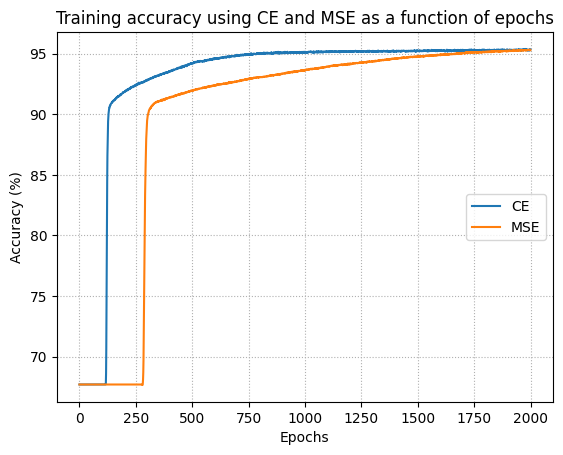

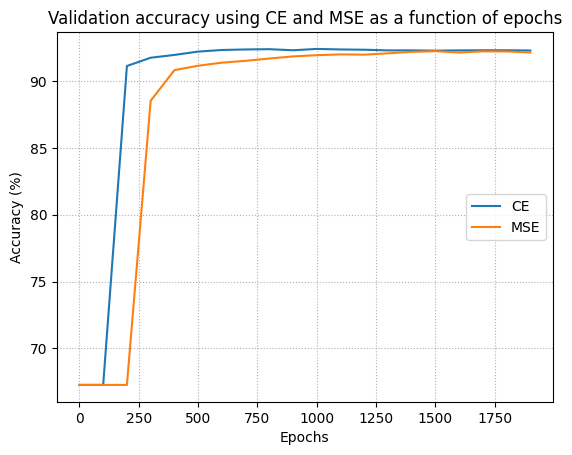

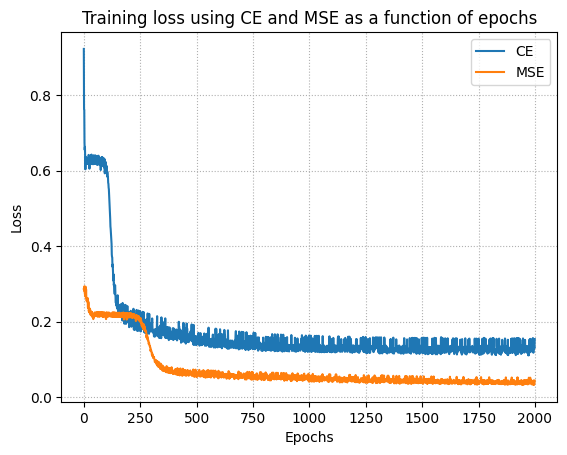

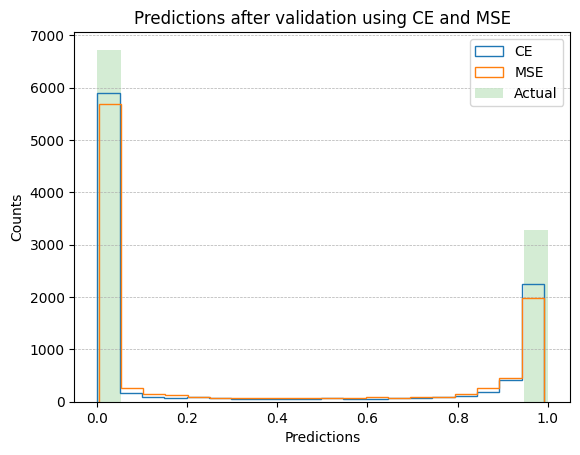

In [7]:
# Plots of training accuracy, validation accuracy, training loss and predictions using CE and MSE

# Training accuracy
fig = plt.figure()
plt.plot(Train_res_CE[1], label='CE')
plt.plot(Train_res_MSE[1], label='MSE')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.title('Training accuracy using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend(loc='center right')
plt.show()

# Validation accuracy
fig = plt.figure()
plt.plot(np.arange(0, epochs, 100), Train_res_CE[5], label='CE')
plt.plot(np.arange(0, epochs, 100), Train_res_MSE[5], label='MSE')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.title('Validation accuracy using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend(loc='center right')
plt.show()

# Training loss
fig = plt.figure()
plt.plot(Train_res_CE[0], label='CE')
plt.plot(Train_res_MSE[0], label='MSE')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training loss using CE and MSE as a function of epochs')
plt.grid(linestyle=':')
plt.legend()
plt.show()

# Predictions compared to actual labels
fig = plt.figure()
plt.hist(Val_res_CE[3], histtype='step', bins=20, label='CE')
plt.hist(Val_res_MSE[3], histtype='step', bins=20, label='MSE')
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after validation using CE and MSE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

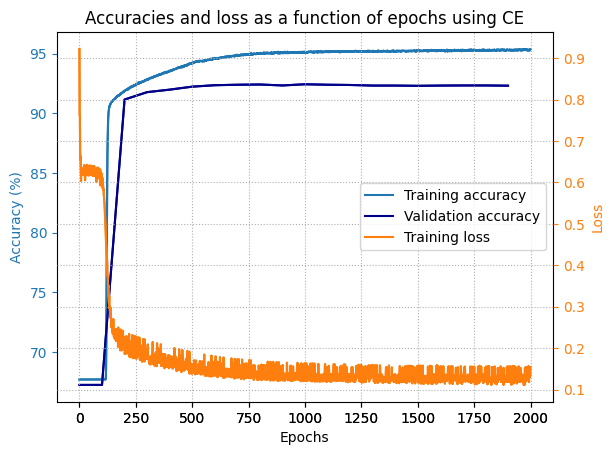

In [8]:
# Plots of training accuracy, validation accuracy and training loss using CE

fig=plt.figure()
ax1=fig.add_subplot(111)
ax2=fig.add_subplot(111, frame_on=False)

ax1.set_title('Accuracies and loss as a function of epochs using CE')

ax1.plot(Train_res_CE[1], color='C0')
ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color = 'darkblue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)', color='C0')
ax1.tick_params(axis='y', colors='C0')

ax2.plot(Train_res_CE[0], color='C1') 
ax2.set_ylabel('Loss', color='C1') 
ax2.yaxis.set_label_position('right') 
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', colors='C1')

l1,=ax1.plot(Train_res_CE[1], color='C0')
l2,=ax1.plot(np.arange(0, epochs, 100), Train_res_CE[5], color='darkblue')
l3,=ax2.plot(Train_res_CE[0], color='C1')
plt.grid(linestyle=':')
plt.legend([l1, l2, l3], ['Training accuracy', 'Validation accuracy', 'Training loss'], loc='center right')

plt.show()

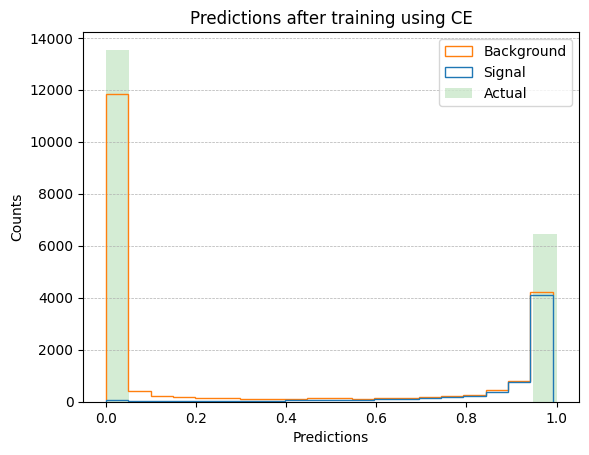

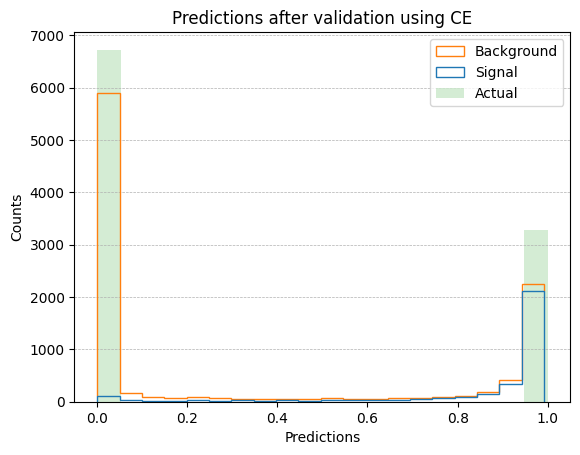

In [9]:
# Plots of predictions after training and validation with separation of signal and background using CE

# Separate signal and background events for training
Pred_back_t: Sequence = []
Pred_sig_t: Sequence = []

for i in range(0, len(Train_res_CE[2])):
    if Train_res_CE[2][i] == 0:
        Pred_back_t.append(Train_res_CE[3][i][0])
    else:
        Pred_sig_t.append(Train_res_CE[3][i][0])

Pred_back_t_arr = np.array(Pred_back_t)
Pred_sig_t_arr = np.array(Pred_sig_t)

# Separate signal and background events for validation
Pred_back: Sequence = []
Pred_sig: Sequence = []

for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back.append(Val_res_CE[3][i][0])
    else:
        Pred_sig.append(Val_res_CE[3][i][0])

Pred_back_arr = np.array(Pred_back)
Pred_sig_arr = np.array(Pred_sig)

# Training predictions
fig = plt.figure()
plt.hist([Pred_sig_t_arr, Pred_back_t_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Train_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after training using CE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

# Validation predictions
fig = plt.figure()
plt.hist([Pred_sig_arr, Pred_back_arr], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions after validation using CE')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

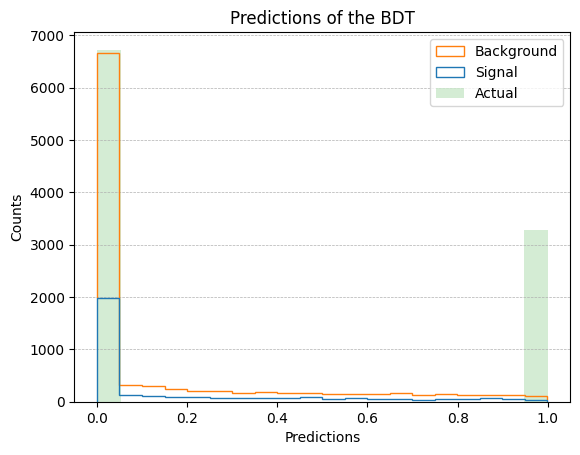

In [10]:
# Plot of predictions of the BDT

# Separate signal and background events
Pred_back_art: Sequence = []
Pred_sig_art: Sequence = []

for i in range(0, len(Val_res_CE[2])):
    if Val_res_CE[2][i] == 0:
        Pred_back_art.append(article_val.values[i][0])
    else:
        Pred_sig_art.append(article_val.values[i][0])

Pred_b_arr_art = np.array(Pred_back_art)
Pred_s_arr_art = np.array(Pred_sig_art)

fig = plt.figure()
plt.hist([Pred_s_arr_art, Pred_b_arr_art], histtype='step', stacked=True, bins=20,
         label=['Signal', 'Background'])
plt.hist(Val_res_CE[2], histtype='bar', bins=19, alpha=0.2, label='Actual')
plt.xlabel('Predictions')
plt.ylabel('Counts')
plt.title('Predictions of the BDT')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

### Assessing a good cut value for accuracy computation

In [11]:
# Cut : value between 0 and 1 determining which predictions are signal or background
# For example, with a cut of 0.2, all predictions above 0.2 are considered signal, the other background

cut_range = np.arange(0.1, 1, 0.1)

Acc_cut_tot: Sequence = []
Acc_cut_back: Sequence = []
Acc_cut_sig: Sequence = []
Acc_cut_article: Sequence = []

# Validation for every cut value
for cut in cut_range:

    Val_res_c: Tuple = NetCE.validate(inputs=norm_dataset_val, targets=bin_labels_val,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Val_res_c[2])):
        if Val_res_c[2][i] == 0:
            Actual_back.append(Val_res_c[2][i])
            Pred_back.append(Val_res_c[3][i])
        else:
            Actual_sig.append(Val_res_c[2][i])
            Pred_sig.append(Val_res_c[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    # Compute BDT accuracy
    Round_article = np.where(article_val.values >= cut, 1, 0)
    Acc_article_val = np.mean(Round_article==bin_labels_val) * 100

    Acc_cut_tot.append(Val_res_c[1])
    Acc_cut_back.append(Acc_back)
    Acc_cut_sig.append(Acc_sig)
    Acc_cut_article.append(Acc_article_val)

    print(f'Cut = {cut:.1f}')
    print(f'Acc = {Val_res_c[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')
    print(f'Acc BDT = {Acc_article_val:.3f}')
    print("-----------------------------------------------")

Cut = 0.1
Acc = 90.750 Acc back = 88.342 Acc sig = 95.695
Acc BDT = 93.620
-----------------------------------------------
Cut = 0.2
Acc = 91.660 Acc back = 90.275 Acc sig = 94.504
Acc BDT = 90.410
-----------------------------------------------
Cut = 0.3
Acc = 92.280 Acc back = 91.836 Acc sig = 93.191
Acc BDT = 87.030
-----------------------------------------------
Cut = 0.4
Acc = 92.350 Acc back = 92.639 Acc sig = 91.756
Acc BDT = 83.910
-----------------------------------------------
Cut = 0.5
Acc = 92.370 Acc back = 93.442 Acc sig = 90.168
Acc BDT = 80.530
-----------------------------------------------
Cut = 0.6
Acc = 92.200 Acc back = 94.260 Acc sig = 87.969
Acc BDT = 77.770
-----------------------------------------------
Cut = 0.7
Acc = 91.900 Acc back = 94.974 Acc sig = 85.588
Acc BDT = 74.930
-----------------------------------------------
Cut = 0.8
Acc = 91.270 Acc back = 95.896 Acc sig = 81.771
Acc BDT = 72.360
-----------------------------------------------
Cut = 0.9
Acc = 

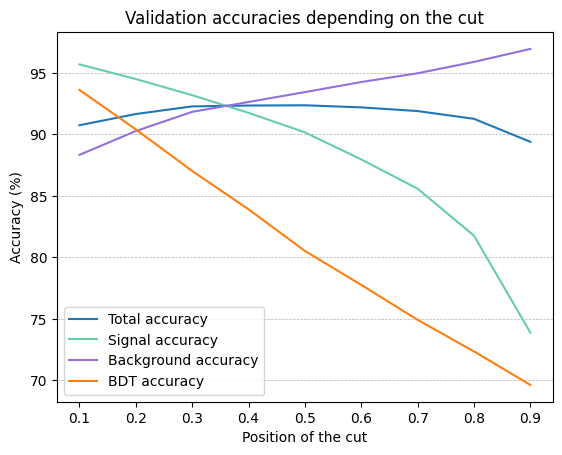

The best cut value:  0.5


In [12]:
# Plots of the total, signal and background validation accuracies compared to the BDT accuracy

fig = plt.figure()
plt.plot(cut_range, Acc_cut_tot, label='Total accuracy')
plt.plot(cut_range, Acc_cut_sig, label='Signal accuracy', color='mediumaquamarine')
plt.plot(cut_range, Acc_cut_back, label='Background accuracy', color='mediumpurple')
plt.plot(cut_range, Acc_cut_article, label='BDT accuracy')
plt.title('Validation accuracies depending on the cut')
plt.xlabel('Position of the cut')
plt.ylabel('Accuracy (%)')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

# Compute the accuracy of the BDT with the cut giving the highest accuracy (0.1)
Round_article_test = np.where(article_test.values >= 0.1, 1, 0)
Acc_article = np.mean(Round_article_test==bin_labels_test) * 100

# Get the cut giving the maximum total accuracy
best_cut = cut_range[np.argmax(Acc_cut_tot)]
print("The best cut value: ",best_cut)

### Ploting the signal against background distribution for specific input variables

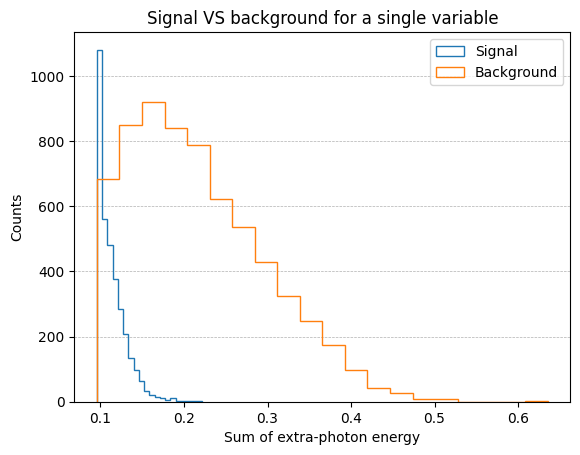

In [13]:
# Plot to assess whether a physical variable allows to discriminate signal and background or not

In_back: Sequence = []
In_sig: Sequence = []

num_col = 0 # number between 0 and 11
datacol = ['Sum of extra-photon energy', 'Number of extra tracks', 'Sum of missing momentum and energy',
           'cos(thrust axis of the signal kaon, thrust axis of other objects)', 'Modified Fox-Wolfram moment Hso_22', 'Recoil mass',
           'Probability to reject fake kaons coming from D+', 'Signal probability for the Btag', 'Modified Fox-Wolfram moment Hso_02',
           'Modified Fox-Wolfram moment Hoo_0', 'Probability to reject fake kaons coming from D0', 'Azimuthal angle between signal kaon and missing-momentum vector']

Round_val = np.where(Val_res_CE[3] >= best_cut, 1, 0)

# Separate signal and background events
for i in range(0, len(Val_res_CE[3])):
    if Round_val[i] == 0:
        In_back.append(Val_res_CE[4][i])
    else:
        In_sig.append(Val_res_CE[4][i])

In_back_arr = np.array(In_back)
In_sig_arr = np.array(In_sig)

fig = plt.figure()
plt.hist(In_sig_arr[:, num_col], histtype='step', bins=20, label='Signal')
plt.hist(In_back_arr[:, num_col], histtype='step', bins=20, label='Background')
plt.title('Signal VS background for a single variable')
plt.xlabel(datacol[num_col])
plt.ylabel('Counts')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
plt.legend()
plt.show()

### Final test accuracy

In [14]:
# Final test to compare the accuracy of our network and the BDT from the article

Acc_tot: Sequence = []
Acc_back_tot: Sequence = []
Acc_sig_tot: Sequence =[]

# Compute the accuracy for different random initializations
for N in range(20):

    net = nm.NeuralNet([
        nm.Linear(input_size=12, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=3),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=3, output_size=9),
        nm.Activation(nm.tanh, nm.tanh_prime),
        nm.Linear(input_size=9, output_size=1),
        nm.Activation(nm.sigmoid, nm.sigmoid_prime),
    ])

    Train_res: Tuple = net.train(inputs=norm_dataset_train, targets=bin_labels_train,
                                    val_inputs=norm_dataset_val, val_targets=bin_labels_val,
                                    loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), num_epochs=1000, cut=best_cut, Print=False)
   
    # Using the test dataset and the best cut value
    Test_res: Tuple = net.validate(inputs=norm_dataset_test, targets=bin_labels_test,
                                            loss=nm.BinCrossEntropy(), iterator=nm.BatchIterator(batch_size=batch_num), cut=best_cut)
    
    Actual_back: Sequence = []
    Pred_back: Sequence = []
    Actual_sig: Sequence = []
    Pred_sig: Sequence = []

    # Separate signal and background events
    for i in range(0, len(Test_res[2])):
        if Test_res[2][i] == 0:
            Actual_back.append(Test_res[2][i])
            Pred_back.append(Test_res[3][i])
        else:
            Actual_sig.append(Test_res[2][i])
            Pred_sig.append(Test_res[3][i])

    Actual_back_arr = np.array(Actual_back)
    Pred_back_arr = np.array(Pred_back)
    Actual_sig_arr = np.array(Actual_sig)
    Pred_sig_arr = np.array(Pred_sig)

    # Compute accuracy for signal and background
    Round_back = np.where(Pred_back_arr >= best_cut, 1, 0)
    Round_sig = np.where(Pred_sig_arr >= best_cut, 1, 0)
    Acc_back = np.mean(Round_back==Actual_back_arr) * 100
    Acc_sig = np.mean(Round_sig==Actual_sig_arr) * 100
    
    Acc_tot.append(Test_res[1])
    Acc_back_tot.append(Acc_back)
    Acc_sig_tot.append(Acc_sig)

    # Print accuracies for each iteration
    print(f'Acc = {Test_res[1]:.3f} Acc back = {Acc_back:.3f} Acc sig = {Acc_sig:.3f}')


Acc_back_arr = np.array(Acc_back_tot)
Acc_sig_arr = np.array(Acc_sig_tot)
Acc_array = np.array(Acc_tot)

# Compute the final accuracies as the mean on the iterations
Acc_final = np.mean(Acc_array)
Acc_back_final = np.mean(Acc_back_arr)
Acc_sig_final = np.mean(Acc_sig_arr)

# Compute the standard deviation
Acc_fin_dev = np.std(Acc_array)
Acc_back_dev = np.std(Acc_back_arr)
Acc_sig_dev = np.std(Acc_sig_arr)

print("---------------------Means---------------------")
print(f'Acc = {Acc_final:.3f} ' + u"\u00B1" + f' {Acc_fin_dev:.3f} Acc back = {Acc_back_final:.3f} ' 
      + u"\u00B1" + f' {Acc_back_dev:.3f} Acc sig = {Acc_sig_final:.3f} ' + u"\u00B1" + f' {Acc_sig_dev:.3f}')
print(f'Acc BDT = {Acc_article:.3f}')

Acc = 90.780 Acc back = 97.415 Acc sig = 76.866
Acc = 82.170 Acc back = 99.454 Acc sig = 45.928
Acc = 88.350 Acc back = 98.272 Acc sig = 67.544
Acc = 85.790 Acc back = 98.833 Acc sig = 58.439
Acc = 86.750 Acc back = 98.892 Acc sig = 61.288
Acc = 89.990 Acc back = 97.785 Acc sig = 73.645
Acc = 84.080 Acc back = 99.306 Acc sig = 52.152
Acc = 85.770 Acc back = 98.922 Acc sig = 58.191
Acc = 81.620 Acc back = 99.557 Acc sig = 44.007
Acc = 89.930 Acc back = 97.534 Acc sig = 73.986
Acc = 81.480 Acc back = 99.513 Acc sig = 43.667
Acc = 81.560 Acc back = 99.601 Acc sig = 43.729
Acc = 92.140 Acc back = 96.131 Acc sig = 83.772
Acc = 86.560 Acc back = 98.892 Acc sig = 60.700
Acc = 91.460 Acc back = 96.987 Acc sig = 79.870
Acc = 92.480 Acc back = 95.274 Acc sig = 86.621
Acc = 92.470 Acc back = 96.027 Acc sig = 85.011
Acc = 85.820 Acc back = 98.981 Acc sig = 58.222
Acc = 91.770 Acc back = 96.588 Acc sig = 81.666
Acc = 89.260 Acc back = 98.065 Acc sig = 70.796
---------------------Means--------------